Prova

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from PIL import Image
from tqdm import tqdm
import filpy

In [11]:
TEST_IMG = 'Pisa_test-case_IMG_5371'
PIC_DIR = filpy.PROJECT_DIR -1 + 'pictures'
PIC_PATH = filpy.FileVar(TEST_IMG+'.jpeg',PIC_DIR)
TEST_DIR = filpy.PROJECT_DIR + 'tests' + 'test_results'
TEST_DIR = TEST_DIR + TEST_IMG + 'random_sampling'
print(TEST_DIR.dir_list())

['2025-10-15_355-175']


In [3]:
CHOICE = '2025-10-15_355-175'
files_list = filpy.dir_files(TEST_DIR, dir=CHOICE,print_res=True)



Files in "/home/bernardo/Scrivania/FISICA/ASTROFISICA/&Argomenti/Filaments/filaments_strc_param/tests/test_results/Pisa_test-case_IMG_5371/random_sampling/2025-10-15_355-175"
 0 - tpfc-sf_2485-2815.npz
 1 - tpfc-sf_1200-1410.npz
 2 - tpfc-sf_1855-1126.npz
 3 - tpfc-sf_1285-2155.npz
 4 - tpfc-sf_1939-948.npz
 5 - tpfc-sf_2042-2483.npz
 6 - tpfc-sf_607-1868.npz
 7 - tpfc-sf_1835-1215.npz
 8 - tpfc-sf_1591-900.npz
 9 - tpfc-sf_2288-823.npz
10 - tpfc-sf_1807-651.npz
11 - tpfc-sf_978-2959.npz
12 - tpfc-sf_2021-1608.npz
13 - tpfc-sf_1834-995.npz
14 - tpfc-sf_2534-2034.npz
15 - tpfc-sf_1466-966.npz
16 - tpfc-sf_1573-2620.npz
17 - tpfc-sf_1034-1069.npz
18 - tpfc-sf_1894-3142.npz
19 - tpfc-sf_617-2244.npz


In [ ]:
lags   = []
xedges = []
yedges = []
xxs    = []
yys    = []
tpcfs  = []
stfcs  = []


for i_file in tqdm(files_list.path()):
    data = np.load(i_file)
    lags   += [data['maxlag']]
    xedges += [data['xedges']]
    yedges += [data['yedges']]
    xxs    += [data['xx']]
    yys    += [data['yy']]
    tpcfs  += [data['tpcf']]
    stfcs  += [data['stfc']]

100%|██████████| 20/20 [00:02<00:00,  8.03it/s]


In [16]:
obj_num = len(files_list)
del files_list


In [17]:
def plot_mask(xmask: tuple[int,int], ymask: tuple[int,int], ax: Axes | None = None):
    (xo,xe) = xmask 
    (yo,ye) = ymask
    if ax is None:
        plt.plot([xo,xo,xe,xe,xo],[yo,ye,ye,yo,yo],color='red')
    else:
        ax.plot([xo,xo,xe,xe,xo],[yo,ye,ye,yo,yo],color='red')

def plot_image(image: np.ndarray, ax: Axes | None = None, **kwargs):
    keys = kwargs.keys()
    if 'cmap' not in keys:
        kwargs['cmap'] = 'gray'
    if 'origin' not in keys:
        kwargs['origin'] = 'lower'

    if ax is None:
        plt.imshow(image,**kwargs)
    else:
        ax.imshow(image,**kwargs)


In [ ]:
picture = Image.open(PIC_PATH.path())
data = np.asarray(picture)
data = data[:,:3250]
avg_data = np.average(data,axis=2)
del picture

100%|██████████| 20/20 [00:00<00:00, 266.06it/s]


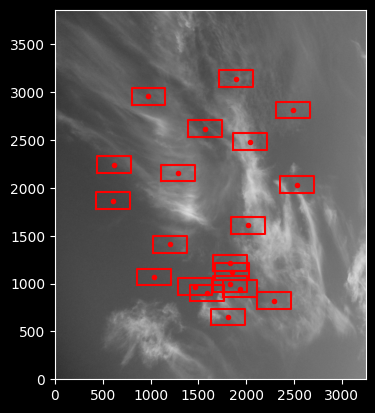

In [18]:
plt.figure()
plot_image(avg_data)
for i in tqdm(range(obj_num)):
    xc = int(np.mean(xedges[i]))
    yc = int(np.mean(yedges[i]))
    plt.plot(xc,yc,'.r')
    plot_mask(xedges[i],yedges[i])

plt.show()
plt.close('all')


100%|██████████| 3/3 [01:23<00:00, 27.75s/it]


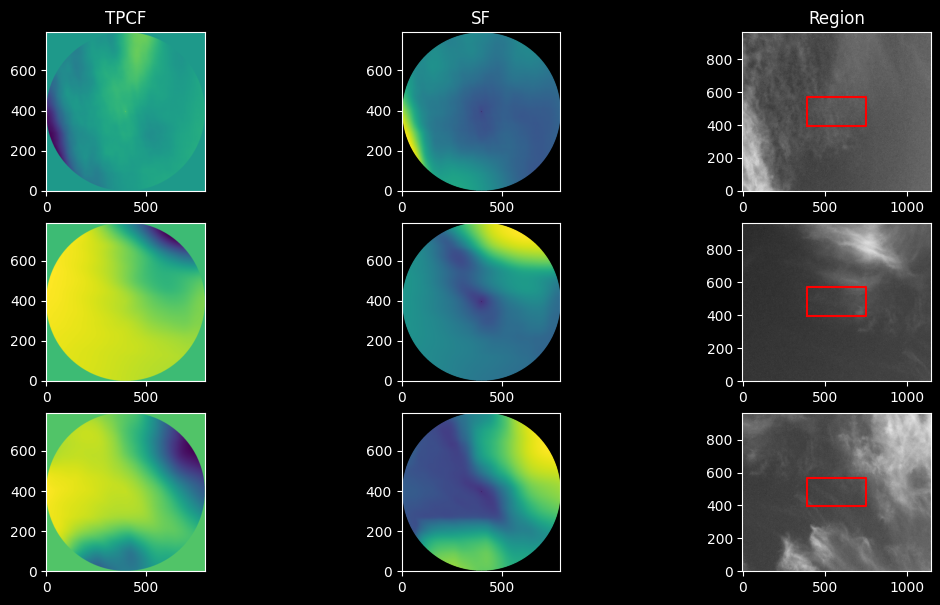

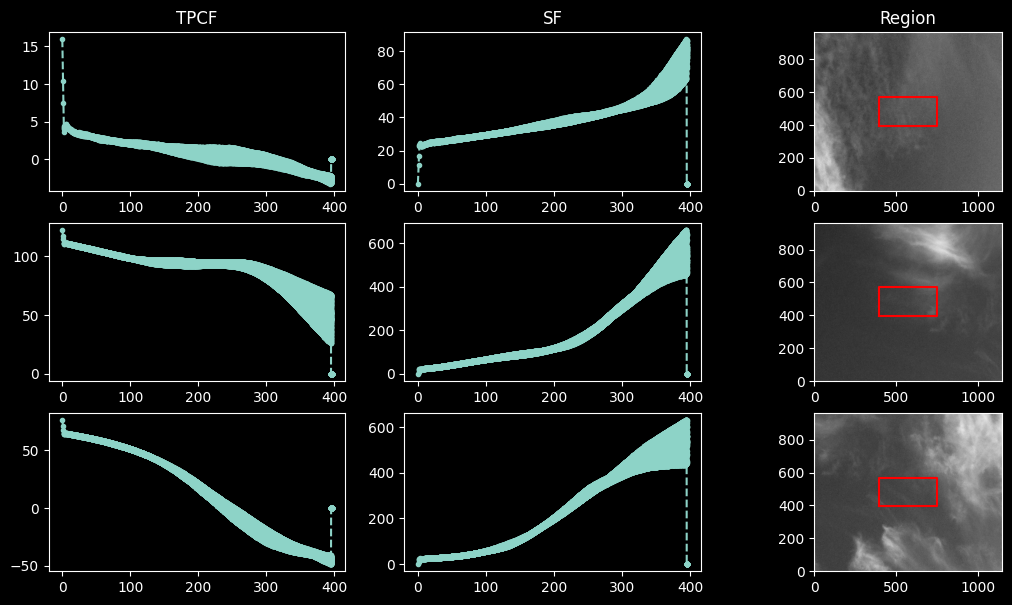

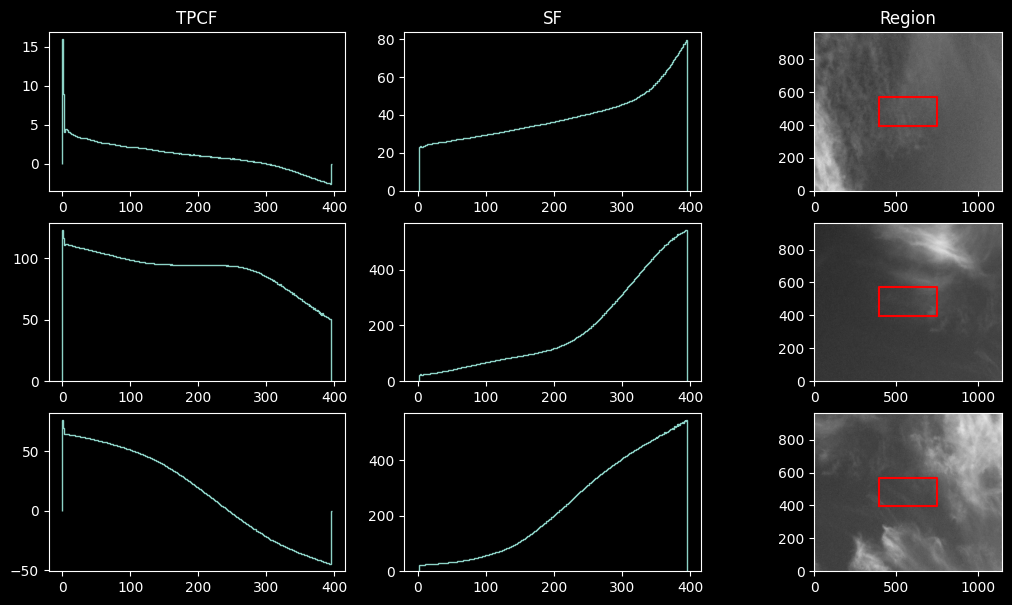

In [ ]:
nrows = 3
fig1, axs1 = plt.subplots(nrows,3,figsize=(13,7))
fig2, axs2 = plt.subplots(nrows,3,figsize=(13,7))
fig3, axs3 = plt.subplots(nrows,3,figsize=(13,7))
for i in tqdm(range(nrows)):
    if i == 0:
        axs1[i,0].set_title('TPCF')
        axs1[i,1].set_title('SF')
        axs1[i,2].set_title('Region')
        axs2[i,0].set_title('TPCF')
        axs2[i,1].set_title('SF')
        axs2[i,2].set_title('Region')
        axs3[i,0].set_title('TPCF')
        axs3[i,1].set_title('SF')
        axs3[i,2].set_title('Region')

    maxlag = lags[i]
    tpcf_i = filpy.combine_results(tpcfs[i])
    stfc_i = filpy.combine_results(stfcs[i])
    plot_image(tpcf_i,ax=axs1[i,0],cmap='viridis')
    plot_image(stfc_i,ax=axs1[i,1],cmap='viridis',norm='log')
    xcut = xedges[i] + np.array([-maxlag,maxlag])
    ycut = yedges[i] + np.array([-maxlag,maxlag])
    cut_data = avg_data[slice(*ycut),slice(*xcut)]
    plot_image(cut_data,ax=axs1[i,2])
    plot_mask((maxlag,xcut[1]-xedges[i][0]),(maxlag,ycut[1]-yedges[i][0]),ax=axs1[i,2])


    t_dists, tpcf_i = filpy.convolve_result(tpcfs[i])
    s_dists, stfc_i = filpy.convolve_result(stfcs[i])
    axs2[i,0].plot(t_dists,tpcf_i,'.--')
    axs2[i,1].plot(s_dists,stfc_i,'.--')
    plot_image(cut_data,ax=axs2[i,2])
    plot_mask((maxlag,xcut[1]-xedges[i][0]),(maxlag,ycut[1]-yedges[i][0]),ax=axs2[i,2])

    bt_dists = np.arange(t_dists.max()+1)
    bs_dists = np.arange(s_dists.max()+1)
    tpcf_i = np.array([ np.mean(tpcf_i[*np.where(np.logical_and(t_dists>=bt_dists[j],t_dists<bt_dists[j+1]))])  for j in range(len(bt_dists)-1)])
    stfc_i = np.array([ np.mean(stfc_i[*np.where(np.logical_and(s_dists>=bs_dists[j],s_dists<bs_dists[j+1]))])  for j in range(len(bs_dists)-1)])
    axs3[i,0].stairs(tpcf_i,bt_dists)
    axs3[i,1].stairs(stfc_i,bs_dists)
    plot_image(cut_data,ax=axs3[i,2])
    plot_mask((maxlag,xcut[1]-xedges[i][0]),(maxlag,ycut[1]-yedges[i][0]),ax=axs3[i,2])

del maxlag, tpcf_i, stfc_i, xcut, ycut, cut_data, bt_dists, bs_dists
plt.show()
plt.close('all')